In [32]:
# Import Required Libraries
library(dplyr)
library(lubridate)
library(tsibble)
library(ggplot2)

In [33]:
# Source Helper Functions
source("data_cleaning_helpers.R")

## Load and Inspect Calendar Data

In [34]:
# Load calendar data
calendar <- read.csv("../calendar_afcs2025.csv")

# Clean calendar data
cleaned_calendar <- cast_calendar_date(calendar)

# Display cleaned data
head(cleaned_calendar)

,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX
,<date>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
1,2011-01-29,11101,Saturday,1,1,2011,NA,NA,NA,NA,0
2,2011-01-30,11101,Sunday,2,1,2011,NA,NA,NA,NA,0
3,2011-01-31,11101,Monday,3,1,2011,NA,NA,NA,NA,0
4,2011-02-01,11101,Tuesday,4,2,2011,NA,NA,NA,NA,1
5,2011-02-02,11101,Wednesday,5,2,2011,NA,NA,NA,NA,0
6,2011-02-03,11101,Thursday,6,2,2011,NA,NA,NA,NA,1


## Load and Inspect Sell Prices Data

In [35]:
# Load sell prices data
sell_prices <- read.csv("../sell_prices_afcs2025.csv")

# Clean sell prices data
cleaned_sell_prices <- clean_sell_prices(sell_prices)

# Display cleaned data
head(cleaned_sell_prices)

,item_id,wm_yr_wk,sell_price
,<chr>,<int>,<dbl>
1,FOODS_3_001,11101,2.28
2,FOODS_3_001,11102,2.28
3,FOODS_3_001,11103,2.28
4,FOODS_3_001,11104,2.28
5,FOODS_3_001,11105,2.28
6,FOODS_3_001,11106,2.28


## Load and Inspect Train Data

In [36]:
# Load train data
train <- read.csv("../sales_train_validation_afcs2025.csv")

# Clean train data
cleaned_train <- clean_train_data(train)

# Display cleaned data
head(cleaned_train)

day,FOODS_3_001,FOODS_3_002,FOODS_3_003,FOODS_3_004,FOODS_3_005,FOODS_3_006,FOODS_3_007,FOODS_3_008,FOODS_3_009,⋯,FOODS_3_818,FOODS_3_819,FOODS_3_820,FOODS_3_821,FOODS_3_822,FOODS_3_823,FOODS_3_824,FOODS_3_825,FOODS_3_826,FOODS_3_827
<date>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2011-01-29,0,0,0,0,0,0,27,0,0,⋯,0,9,3,0,7,0,0,0,0,0
2011-01-30,2,0,0,0,1,0,27,0,0,⋯,0,0,2,0,5,0,1,0,0,0
2011-01-31,1,0,0,0,1,0,8,0,0,⋯,0,3,1,0,5,0,0,0,0,0
2011-02-01,3,0,0,0,0,0,0,0,0,⋯,0,0,3,0,3,0,1,2,0,0
2011-02-02,0,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,1,0,0
2011-02-03,0,0,0,0,1,0,11,0,0,⋯,0,6,0,0,3,0,2,1,0,0


## Analyze Total Sales

Plot variable not specified, automatically selected `.vars = FOODS_3_001`


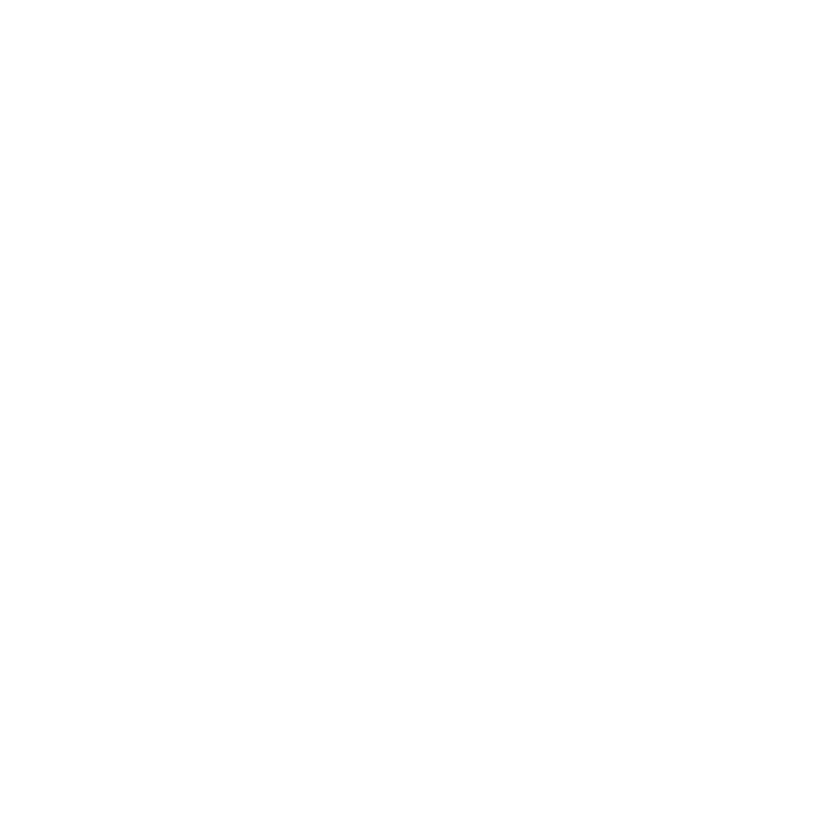

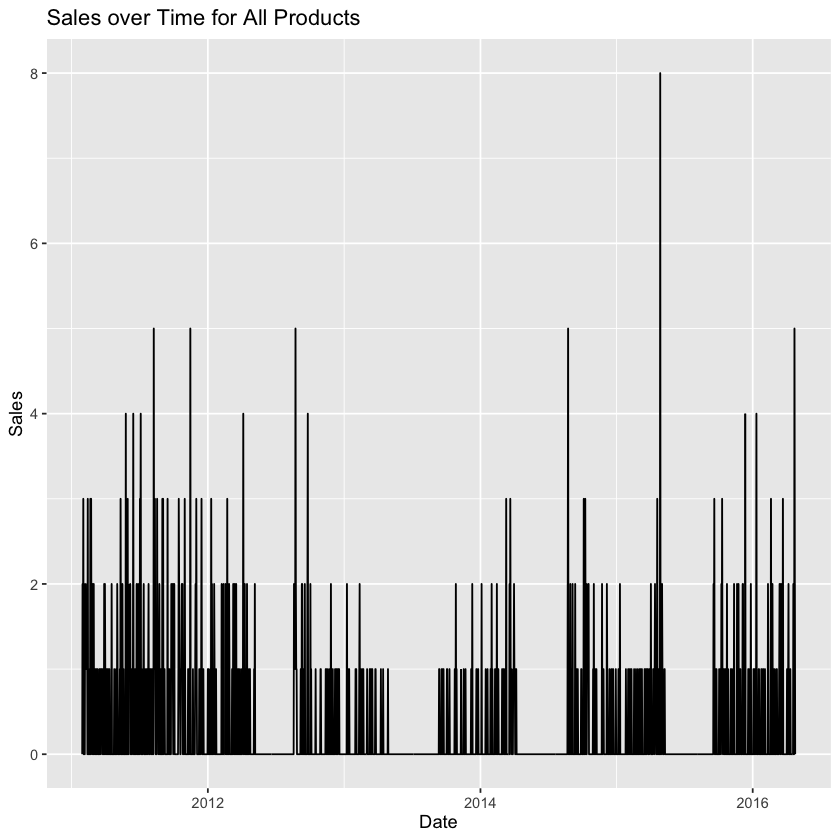

In [37]:
# Plot total sales
plot_total_sales(cleaned_train)